In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2
import os
from keras.utils import to_categorical

In [ ]:
#Enlace a google drive
from google.colab import drive
drive.mount('/content/drive')

#Direccion de contenido 
train_path = ('/content/drive/MyDrive/p2/Train/Train')
val_path = ('/content/drive/MyDrive/p2/Validation/Validation')
test_path = ('/content/drive/MyDrive/p2/Test/Test')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(360, 360),
        batch_size=32,
        class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(360, 360),
        batch_size=32,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        val_path,
        target_size=(360, 360),
        batch_size=32,
        class_mode = 'categorical')

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


Found 458 images belonging to 1 classes.
Found 430 images belonging to 1 classes.
Found 434 images belonging to 1 classes.


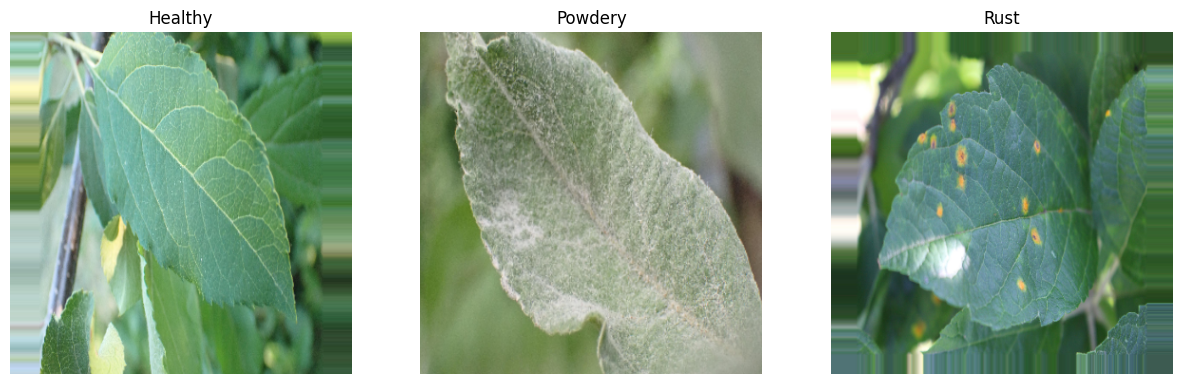

In [ ]:
# Obtener una muestra de cada clase
class_names = train_generator.class_indices.keys()
samples = []
for class_name in class_names:
    sample_generator = train_datagen.flow_from_directory(
        directory=train_path,
        target_size=(360, 360),
        batch_size=1,
        classes=[class_name])
    sample = sample_generator.next()[0][0]
    samples.append((class_name, sample))

# Visualizar las muestras
fig, axes = plt.subplots(nrows=1, ncols=len(samples), figsize=(15,5))
for ax, sample in zip(axes, samples):
    ax.imshow(sample[1])
    ax.set_title(sample[0])
    ax.axis('off')
plt.show()

In [ ]:
model = Sequential()

# Capa convolucional con 32 filtros de tamaño 3x3, activación relu y entrada de tamaño 150x150x3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(360, 360, 3)))
# Capa de pooling
model.add(MaxPooling2D((2, 2)))

# Capa convolucional con 64 filtros de tamaño 3x3 y activación relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# Capa de pooling
model.add(MaxPooling2D((2, 2)))

# Capa convolucional con 128 filtros de tamaño 3x3 y activación relu
model.add(Conv2D(128, (3, 3), activation='relu'))
# Capa de pooling
model.add(MaxPooling2D((2, 2)))

# Capa convolucional con 256 filtros de tamaño 3x3 y activación relu
model.add(Conv2D(256, (3, 3), activation='relu'))
# Capa de pooling
model.add(MaxPooling2D((2, 2)))

# Capa de aplanamiento
model.add(Flatten())

# Capa completamente conectada (dense) con 512 neuronas y activación relu
model.add(Dense(512, activation='relu'))

# Capa de salida con 3 neuronas y activación softmax (pues son 3 clases a clasificar)
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])




In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='min', restore_best_weights=True)

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=13,callbacks=[early_stop, learning_rate_reduction]) 


Epoch 1/13
42/42 [==============================] - 496s 11s/step - loss: 1.2981 - accuracy: 0.4622 - val_loss: 0.6392 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 2/13
42/42 [==============================] - 237s 6s/step - loss: 0.4533 - accuracy: 0.8290 - val_loss: 0.5285 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 3/13
42/42 [==============================] - 240s 6s/step - loss: 0.3904 - accuracy: 0.8691 - val_loss: 0.3417 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 4/13
42/42 [==============================] - 235s 6s/step - loss: 0.3491 - accuracy: 0.8850 - val_loss: 0.2695 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/13
42/42 [==============================] - 234s 6s/step - loss: 0.2210 - accuracy: 0.9274 - val_loss: 0.4604 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 6/13
42/42 [==============================] - 233s 6s/step - loss: 0.1875 - accuracy: 0.9334 - val_loss: 0.2201 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 7/13
42/42 [==============================] - 232s 6s/step - loss: 0.

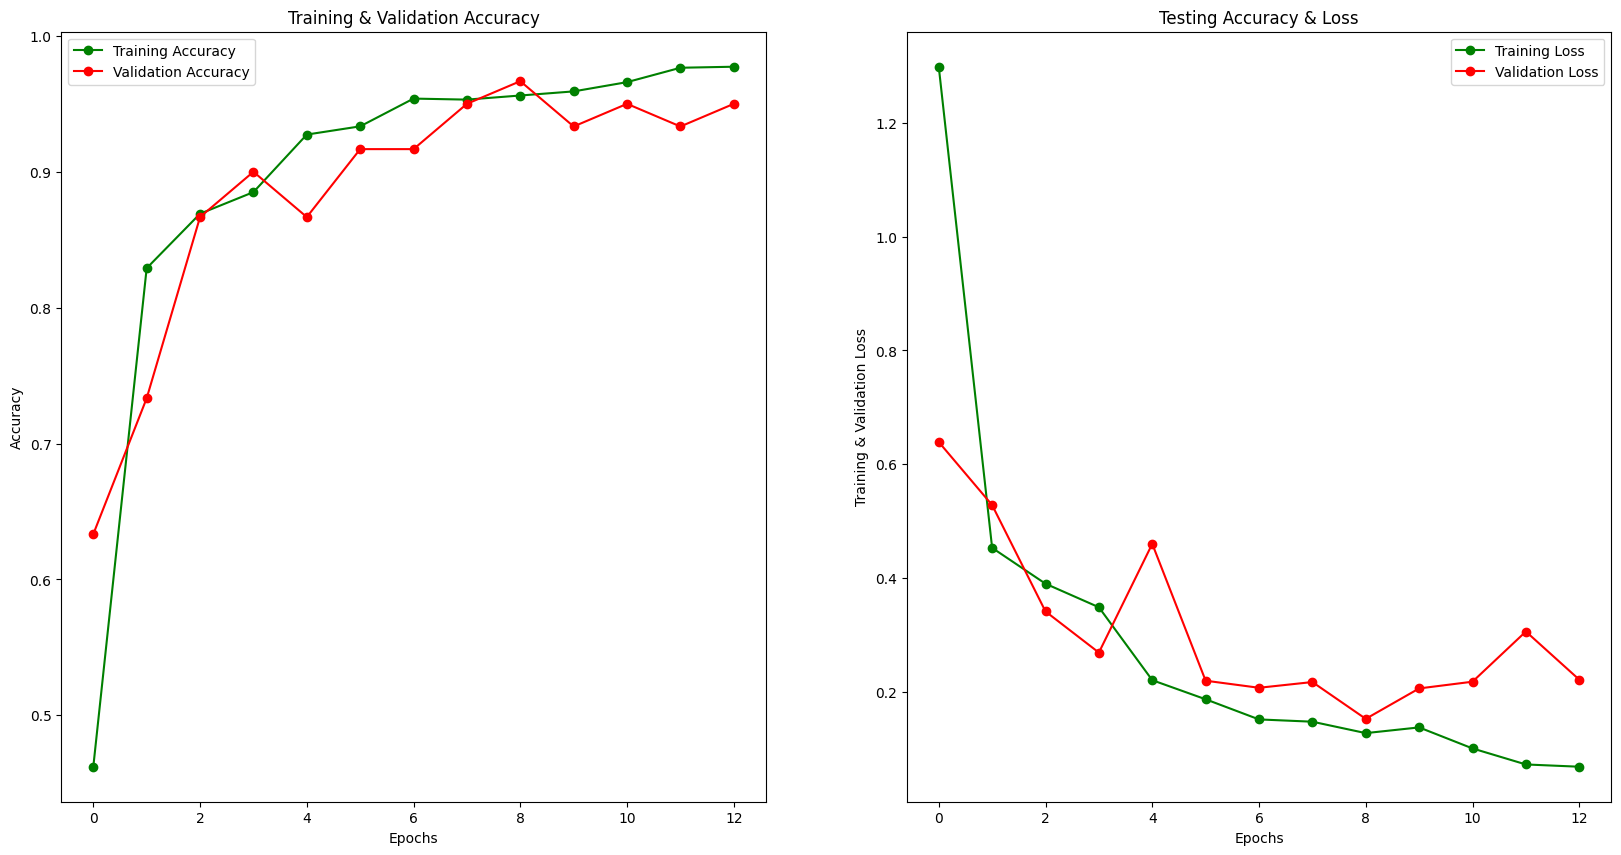

In [ ]:
epochs = [i for i in range(13)]

# Crear una figura y dos subplots
fig , ax = plt.subplots(1,2)

# Obtener los datos de precisión y pérdida de entrenamiento y validación
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Establecer el tamaño de la figura
fig.set_size_inches(20,10)

# Graficar precisión de entrenamiento y validación en el primer subplot
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Graficar pérdida de entrenamiento y validación en el segundo subplot
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")

# Mostrar el gráfico
plt.show()


Image 1 - True label: Healthy
1/1 [==============================] - 0s 29ms/step
Healthy: 99.48%
Powdery: 0.29%
Rust: 0.23%


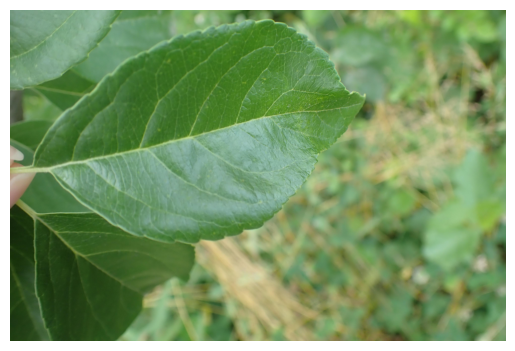


Image 2 - True label: Powdery
1/1 [==============================] - 0s 31ms/step
Powdery: 99.37%
Healthy: 0.59%
Rust: 0.04%


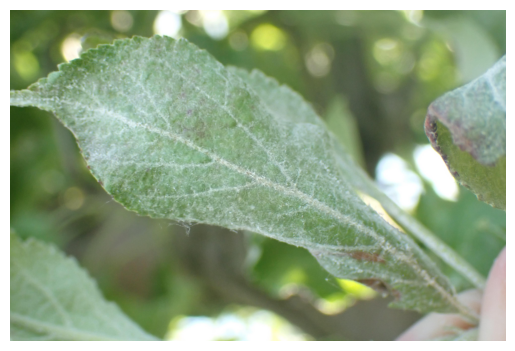


Image 3 - True label: Rust
1/1 [==============================] - 0s 24ms/step
Rust: 99.99%
Healthy: 0.01%
Powdery: 0.00%


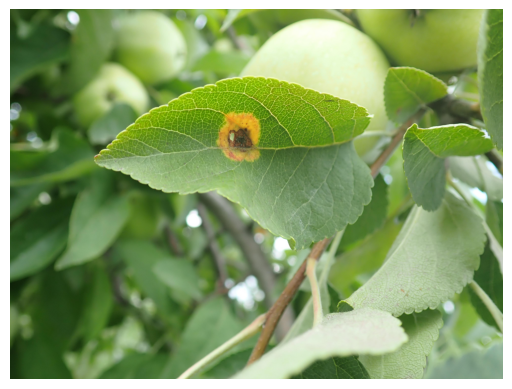

In [ ]:
dic = train_generator.class_indices
icd = {k:v for v,k in dic.items()}

def output(location):
    img = load_img(location, target_size=(360, 360, 3))
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict_x = model.predict(img)[0]
    sorted_indexes = np.argsort(predict_x)[::-1]
    for index in sorted_indexes:
        print(f"{icd[index]}: {predict_x[index]*100:.2f}%")
    image = plt.imread(location)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# Obtener la lista de etiquetas
labels = list(train_generator.class_indices.keys())

# Obtener algunas imágenes de prueba y sus etiquetas verdaderas
image_list = []
true_labels = []
for label in labels:
    path = os.path.join(test_path, label)
    images = os.listdir(path)[:1] # tomar solo las primeras 5 imágenes
    for img in images:
        image_list.append(os.path.join(path, img))
        true_labels.append(label)
true_labels = np.array(true_labels)

# Mostrar algunas imágenes de prueba con etiquetas predichas
for i in range(3):
    image_path = image_list[i]
    label = true_labels[i]
    print(f"\nImage {i+1} - True label: {label}")
    output(image_path)




In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

5/5 [==============================] - 56s 13s/step - loss: 0.2819 - accuracy: 0.9467
Test Loss: 0.2819423973560333
Test Accuracy: 0.9466666579246521
